#Loading the data

In [7]:
!pip install jupyterthemes

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [9]:
df=pd.read_csv('twitter.csv')

In [10]:
df= df.drop(['id'], axis =1)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
df['length']= df['tweet'].apply(len)
df.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


## EDA on raw data

In [13]:
df.describe()

,label,length
count,21602.000000,21602.000000
mean,0.069114,84.857698
std,0.253654,29.332849
min,0.000000,12.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


<Axes: >

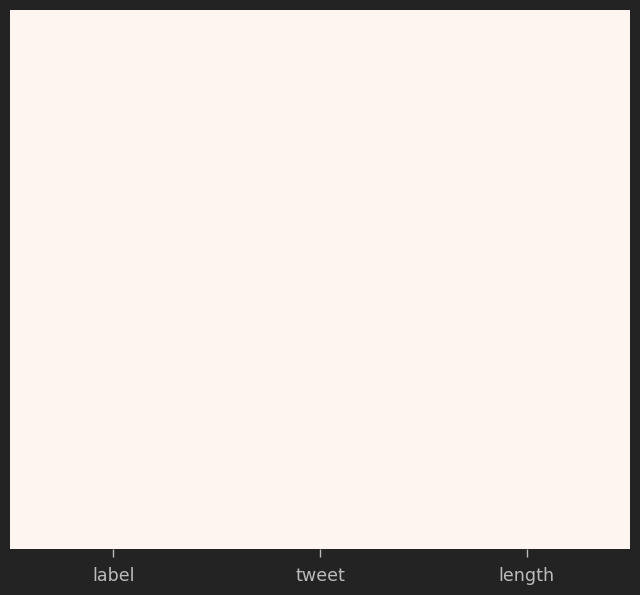

In [14]:
sns.heatmap(df.isnull() ,yticklabels=False, cbar=False, cmap="Reds")

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'length'}>]], dtype=object)

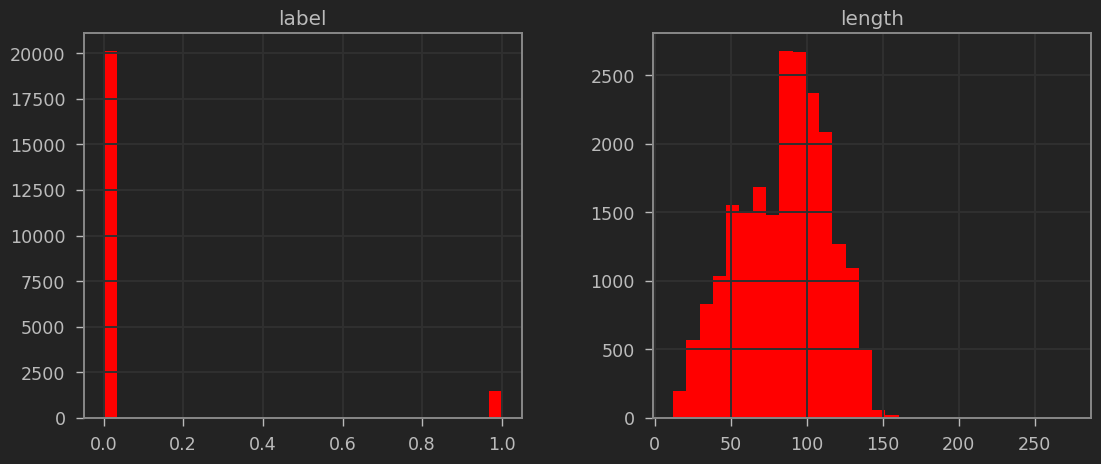

In [15]:
df.hist(bins= 30, color= 'red', figsize= (13,5))

# Removing stopwords and punctuations

In [16]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def message_cleaning(message):
    punc_removed=[word for word in message if word not in string.punctuation]
    jned=''.join(punc_removed)
    stp_rm=[word for word in jned.split() if word.lower() not in stopwords.words('english')]
    return stp_rm

In [18]:
df_clean=df['tweet'].apply(message_cleaning)

In [19]:
#cleaned up tweet
print(df_clean[5])
#original 5 tweets
print(df['tweet'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [20]:
all_words = []
for message in df_clean:
    for word in message:
        all_words.append(word)

In [21]:
senten=' '.join(all_words)

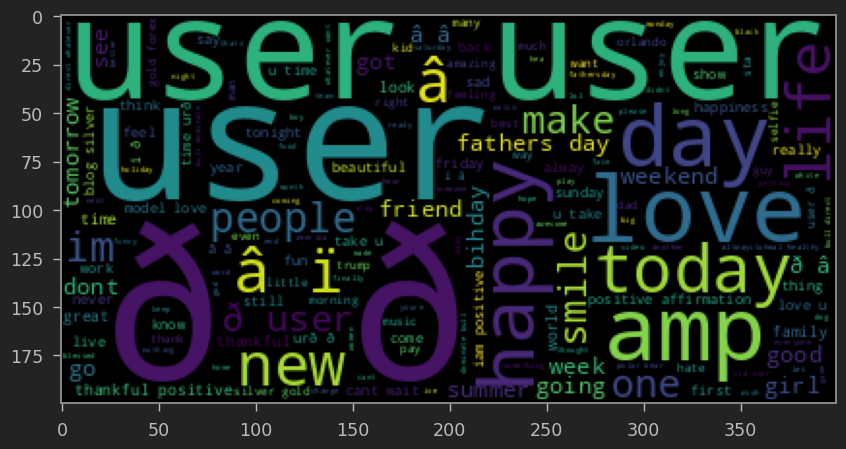

In [22]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wordcloud=WordCloud().generate(senten)
plt.imshow(wordcloud)

# For Positive tweets

In [23]:
positive = df[df['label'] == 0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [24]:
p_as=positive['tweet'].tolist()
p_as_a_string=' '.join(p_as)

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [25]:
p_clean= message_cleaning(p_as_a_string)

In [26]:
p_clean_joined=' '.join(p_clean)

In [27]:
def gen_wordcloud(message):
  plt.figure(figsize=(10,10))
  wordcloud=WordCloud().generate(message)
  plt.imshow(wordcloud)

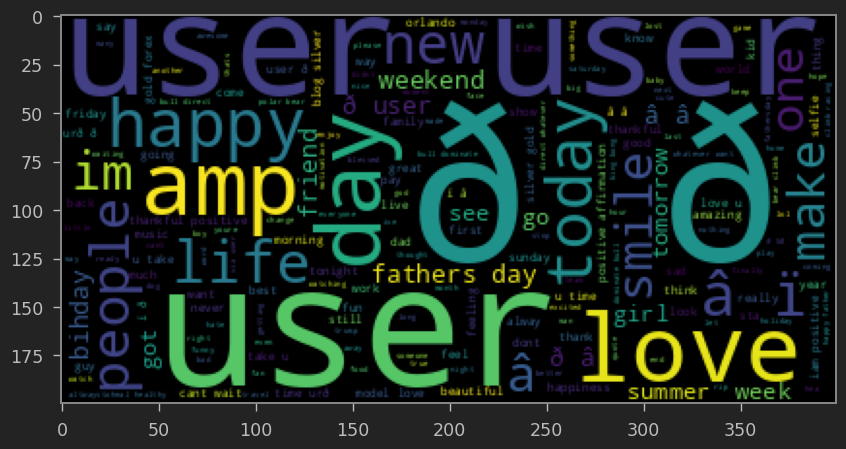

In [28]:
gen_wordcloud(p_clean_joined)

# For negative tweets

In [29]:
negative = df[df['label'] == 1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


In [30]:
n_as=negative['tweet'].tolist()
n_as_a_string=' '.join(n_as)
n_clean= message_cleaning(n_as_a_string)

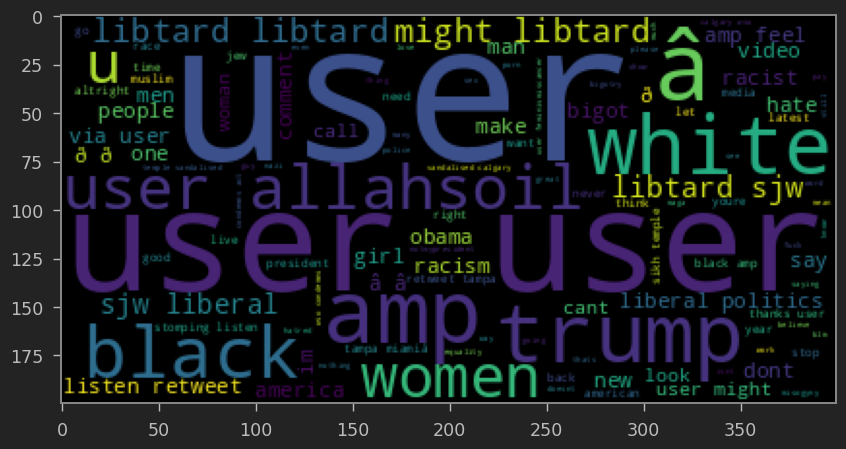

In [31]:
n_clean_joined=' '.join(n_clean)
gen_wordcloud(n_clean_joined)

# Tokenization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer(analyzer=message_cleaning,dtype = np.uint8)
count_vector=vectorizer.fit_transform(df['tweet'])

In [33]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾®\x9fð\x9f\x8f¾ó¾\xad»' 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86']


In [34]:
print(count_vector.shape)

(21602, 36465)


In [35]:
X = pd.DataFrame(count_vector.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,36455,36456,36457,36458,36459,36460,36461,36462,36463,36464
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Y= df['label']

# Training a Naive Bayes Classifier model

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [38]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

<Axes: >

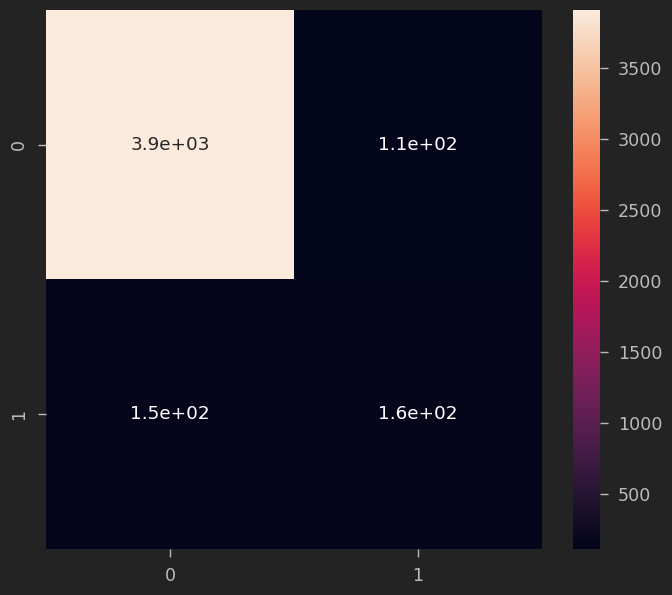

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)

sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4018
           1       0.58      0.51      0.54       303

    accuracy                           0.94      4321
   macro avg       0.77      0.74      0.76      4321
weighted avg       0.94      0.94      0.94      4321

